# 05_backtesting.ipynb

## Notebook Purpose
This notebook is designed to backtest trading strategies using historical data. It will apply the strategies to the data, evaluate their performance, and visualize the results.

## Instructions
1. **Import Necessary Libraries**:
   - Import `pandas` for data manipulation.
   - Import functions from `backtesting.py` for running backtests.

2. **Load Preprocessed Data**:
   - Load the preprocessed CSV file created in the first notebook.

3. **Define Trading Strategy**:
   - Use or modify the provided `example_strategy` function or define a new strategy function.

4. **Run Backtest**:
   - Use the `run_backtest` function to apply the trading strategy to the historical data.
   - Evaluate the performance of the strategy.

5. **Save Backtest Results**:
   - Save the backtest results to a new CSV file.

6. **Visualize Results**:
   - Generate visualizations to analyze the performance of the trading strategy over time.

## Example Code
```python
# Import necessary libraries
import pandas as pd
from scripts.backtesting import run_backtest, example_strategy

# Load preprocessed data
data_path = 'data/historical_data/btc_usd_preprocessed.csv'  # Update this path based on the selected cryptocurrency
data = pd.read_csv(data_path, parse_dates=['time'], index_col='time')

# Run backtest
results = run_backtest(data, example_strategy)

# Save backtest results
results.to_csv('results/backtest_results.csv')

# Display backtest results
results.head()

# Plot portfolio value over time
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Portfolio Value'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.show()


In [1]:
# Cell 1: Import necessary libraries and verify
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import sys
    import os
    
    # Add the scripts directory to the Python path
    current_dir = os.getcwd()
    scripts_dir = os.path.join(current_dir, '..', 'scripts')
    if scripts_dir not in sys.path:
        sys.path.append(scripts_dir)

    from backtesting import run_backtest, example_strategy
    print("Libraries imported successfully.")
except ImportError as e:
    print(f"Error importing libraries: {e}")


Libraries imported successfully.


In [2]:
# Cell 2: Load preprocessed data for BTC, ETH, and SOL
crypto_paths = {
    'BTC': '../data/cleaned_data/BTC_cleaned.csv',
    'ETH': '../data/cleaned_data/ETH_cleaned.csv',
    'SOL': '../data/cleaned_data/SOL_cleaned.csv'
}

crypto_data = {}
for crypto, path in crypto_paths.items():
    try:
        data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
        crypto_data[crypto] = data
        print(f"Data loaded successfully for {crypto} from {path}")
    except FileNotFoundError as e:
        print(f"Error loading data for {crypto}: {e}")


Data loaded successfully for BTC from ../data/cleaned_data/BTC_cleaned.csv
Data loaded successfully for ETH from ../data/cleaned_data/ETH_cleaned.csv
Data loaded successfully for SOL from ../data/cleaned_data/SOL_cleaned.csv


In [3]:
# Cell 3: Define Trading Strategies and Prepare Data

# Example Strategy: Moving Average Crossover
def example_strategy(row):
    short_window = 40
    long_window = 100
    
    if 'short_mavg' not in row.index or 'long_mavg' not in row.index:
        return 'hold'

    if row['short_mavg'] > row['long_mavg']:
        return 'buy'
    elif row['short_mavg'] < row['long_mavg']:
        return 'sell'
    else:
        return 'hold'

# Momentum Strategy
def momentum_strategy(row):
    if 'returns' not in row.index:
        return 'hold'
    
    if row['returns'] > 0:
        return 'buy'
    elif row['returns'] < 0:
        return 'sell'
    else:
        return 'hold'

# Mean Reversion Strategy
def mean_reversion_strategy(row):
    if 'z_score' not in row.index:
        return 'hold'
    
    if row['z_score'] < -1:
        return 'buy'
    elif row['z_score'] > 1:
        return 'sell'
    else:
        return 'hold'

# Calculate additional columns for strategies
for crypto, data in crypto_data.items():
    # Calculate moving averages for example strategy
    data['short_mavg'] = data['Close'].rolling(window=40, min_periods=1).mean()
    data['long_mavg'] = data['Close'].rolling(window=100, min_periods=1).mean()

    # Calculate returns for momentum strategy
    data['returns'] = data['Close'].pct_change().fillna(0)

    # Calculate z-score for mean reversion strategy
    data['rolling_mean'] = data['Close'].rolling(window=20).mean()
    data['rolling_std'] = data['Close'].rolling(window=20).std()
    data['z_score'] = (data['Close'] - data['rolling_mean']) / data['rolling_std']

print("Data prepared with additional columns for strategies.")


Data prepared with additional columns for strategies.


In [4]:
# Cell 4: Run Backtests for Each Strategy and Save Results
backtest_results = {}
strategies = {
    'example_strategy': example_strategy,
    'momentum_strategy': momentum_strategy,
    'mean_reversion_strategy': mean_reversion_strategy
}

for strategy_name, strategy_function in strategies.items():
    for crypto, data in crypto_data.items():
        print(f"Running backtest for {crypto} using {strategy_name}")
        results = run_backtest(data, strategy_function)
        results_path = f'../results/{crypto}_{strategy_name}_backtest_results.csv'
        results.to_csv(results_path, index=False)
        backtest_results[f"{crypto}_{strategy_name}"] = results
        print(f"Backtest results saved to {results_path}")


Running backtest for BTC using example_strategy
Backtest results saved to ../results/BTC_example_strategy_backtest_results.csv
Running backtest for ETH using example_strategy
Backtest results saved to ../results/ETH_example_strategy_backtest_results.csv
Running backtest for SOL using example_strategy
Backtest results saved to ../results/SOL_example_strategy_backtest_results.csv
Running backtest for BTC using momentum_strategy
Backtest results saved to ../results/BTC_momentum_strategy_backtest_results.csv
Running backtest for ETH using momentum_strategy
Backtest results saved to ../results/ETH_momentum_strategy_backtest_results.csv
Running backtest for SOL using momentum_strategy
Backtest results saved to ../results/SOL_momentum_strategy_backtest_results.csv
Running backtest for BTC using mean_reversion_strategy
Backtest results saved to ../results/BTC_mean_reversion_strategy_backtest_results.csv
Running backtest for ETH using mean_reversion_strategy
Backtest results saved to ../results


Backtest results for BTC using example strategy:
        Date     Cash  Position  Portfolio Value
0 2013-07-10  10000.0       0.0          10000.0
1 2013-07-11  10000.0       0.0          10000.0
2 2013-07-12  10000.0       0.0          10000.0
3 2013-07-13  10000.0       0.0          10000.0
4 2013-07-14  10000.0       0.0          10000.0


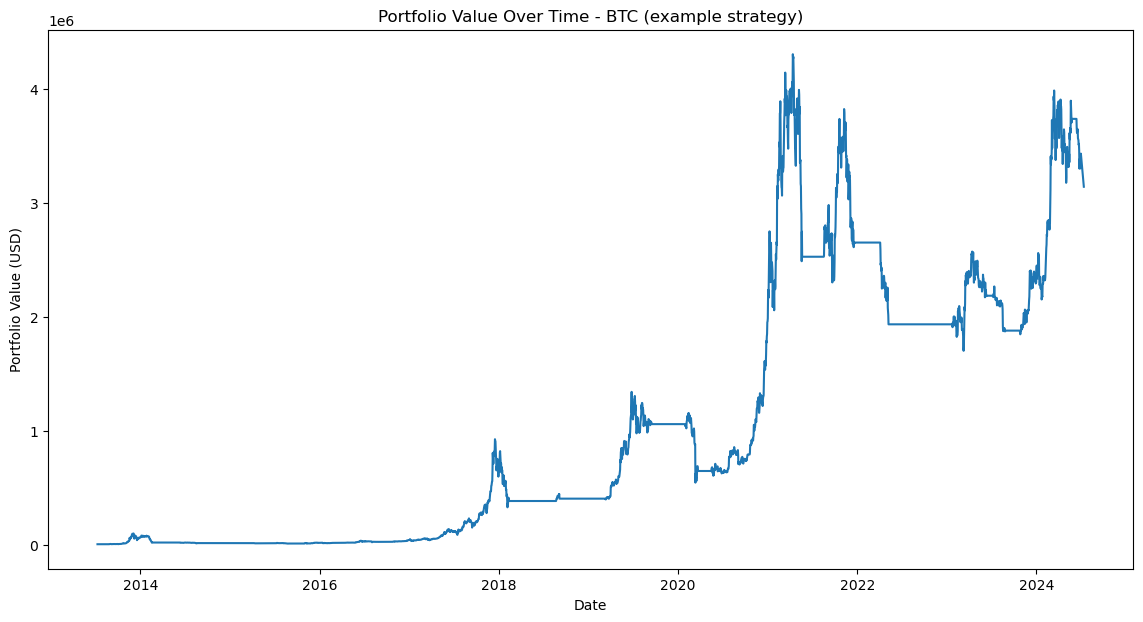


Backtest results for ETH using example strategy:
        Date     Cash  Position  Portfolio Value
0 2013-07-10  10000.0       0.0          10000.0
1 2015-08-07  10000.0       0.0          10000.0
2 2015-08-08  10000.0       0.0          10000.0
3 2015-08-09  10000.0       0.0          10000.0
4 2015-08-10  10000.0       0.0          10000.0


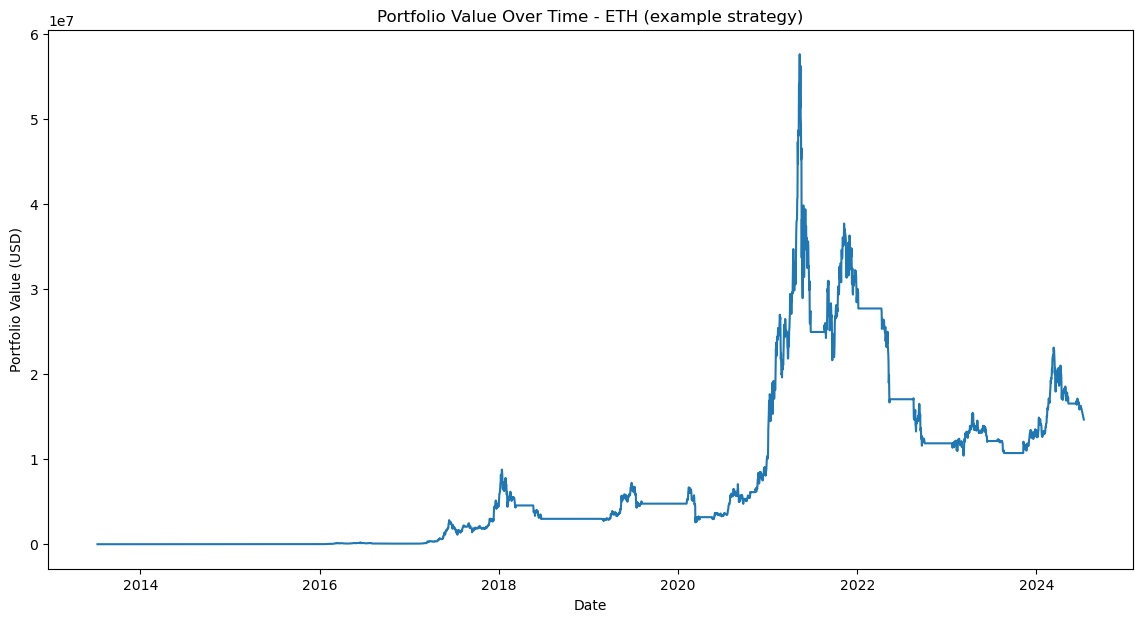


Backtest results for SOL using example strategy:
        Date     Cash  Position  Portfolio Value
0 2013-07-10  10000.0       0.0          10000.0
1 2020-04-10  10000.0       0.0          10000.0
2 2020-04-11  10000.0       0.0          10000.0
3 2020-04-12  10000.0       0.0          10000.0
4 2020-04-13  10000.0       0.0          10000.0


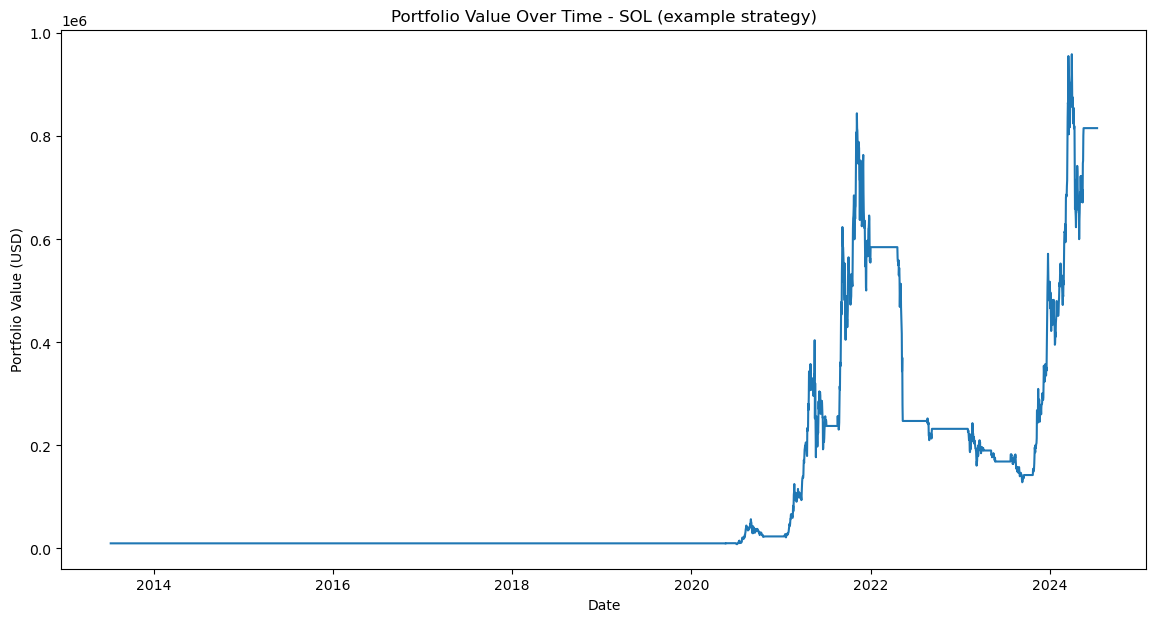


Backtest results for BTC using momentum strategy:
        Date          Cash    Position  Portfolio Value
0 2013-07-10  10000.000000    0.000000     10000.000000
1 2013-07-11      0.000000  112.384806     10000.000000
2 2013-07-12      0.000000  112.384806     10563.047876
3 2013-07-13      0.000000  112.384806     11049.674084
4 2013-07-14  10611.373342    0.000000     10611.373342


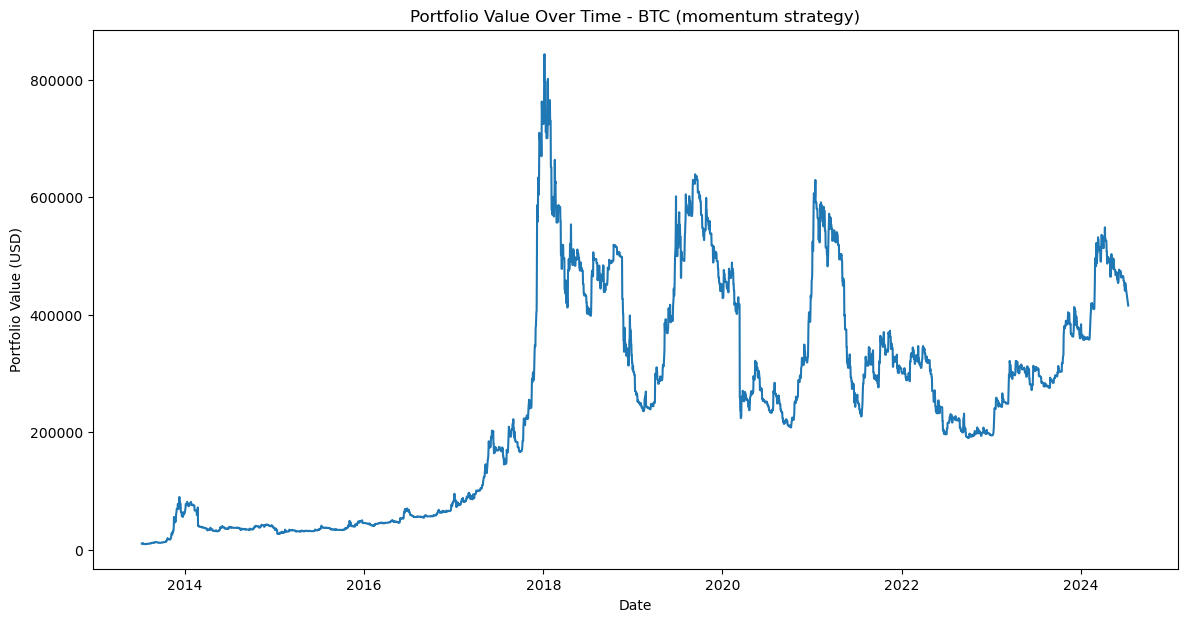


Backtest results for ETH using momentum strategy:
        Date          Cash     Position  Portfolio Value
0 2013-07-10  10000.000000     0.000000     10000.000000
1 2015-08-07      0.000000  3606.202669     10000.000000
2 2015-08-08   2912.369275     0.000000      2912.369275
3 2015-08-09   2912.369275     0.000000      2912.369275
4 2015-08-10   2912.369275     0.000000      2912.369275


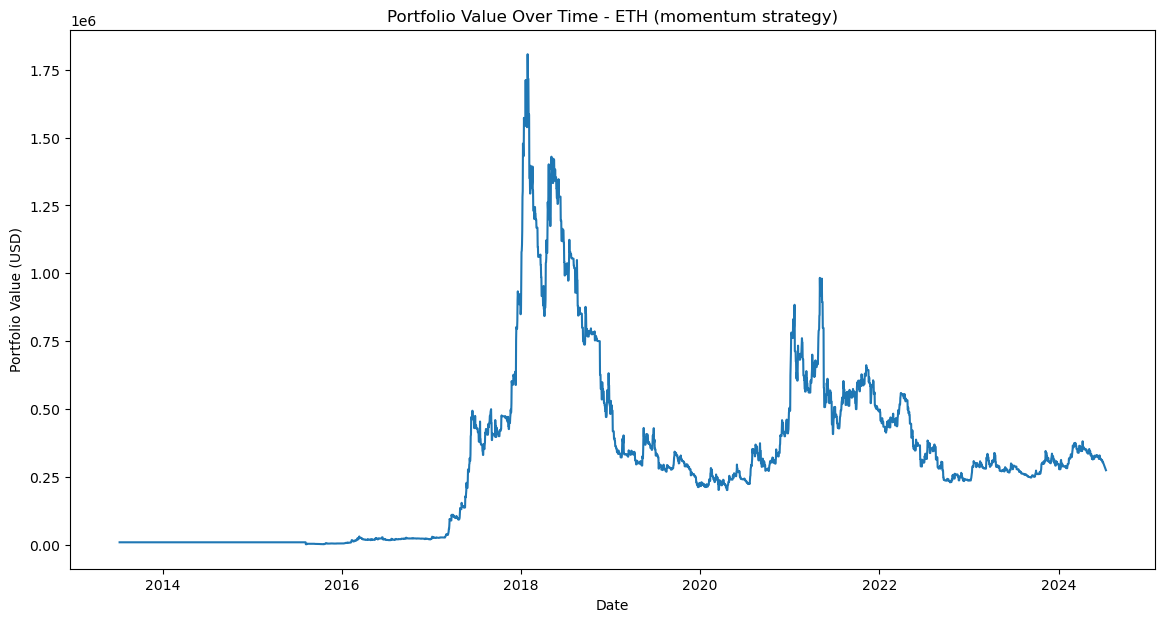


Backtest results for SOL using momentum strategy:
        Date          Cash      Position  Portfolio Value
0 2013-07-10  10000.000000      0.000000     10000.000000
1 2020-04-10      0.000000  10545.186123     10000.000000
2 2020-04-11   8407.676895      0.000000      8407.676895
3 2020-04-12      0.000000   9553.092712      8407.676895
4 2020-04-13   7457.144171      0.000000      7457.144171


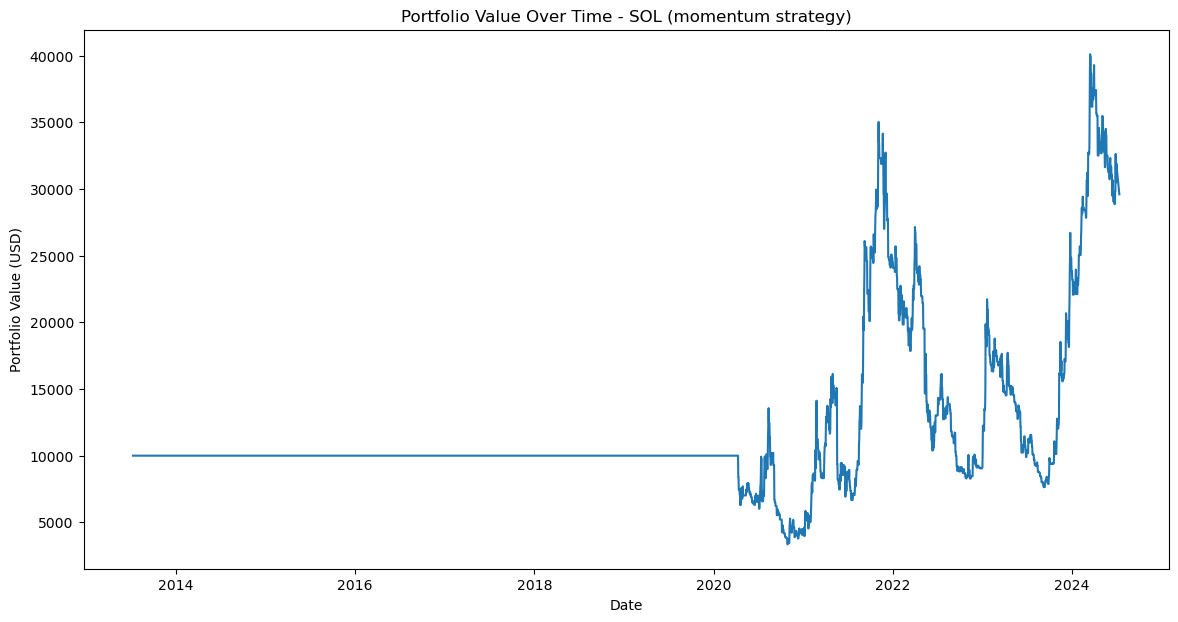


Backtest results for BTC using mean strategy:
        Date     Cash  Position  Portfolio Value
0 2013-07-10  10000.0       0.0          10000.0
1 2013-07-11  10000.0       0.0          10000.0
2 2013-07-12  10000.0       0.0          10000.0
3 2013-07-13  10000.0       0.0          10000.0
4 2013-07-14  10000.0       0.0          10000.0


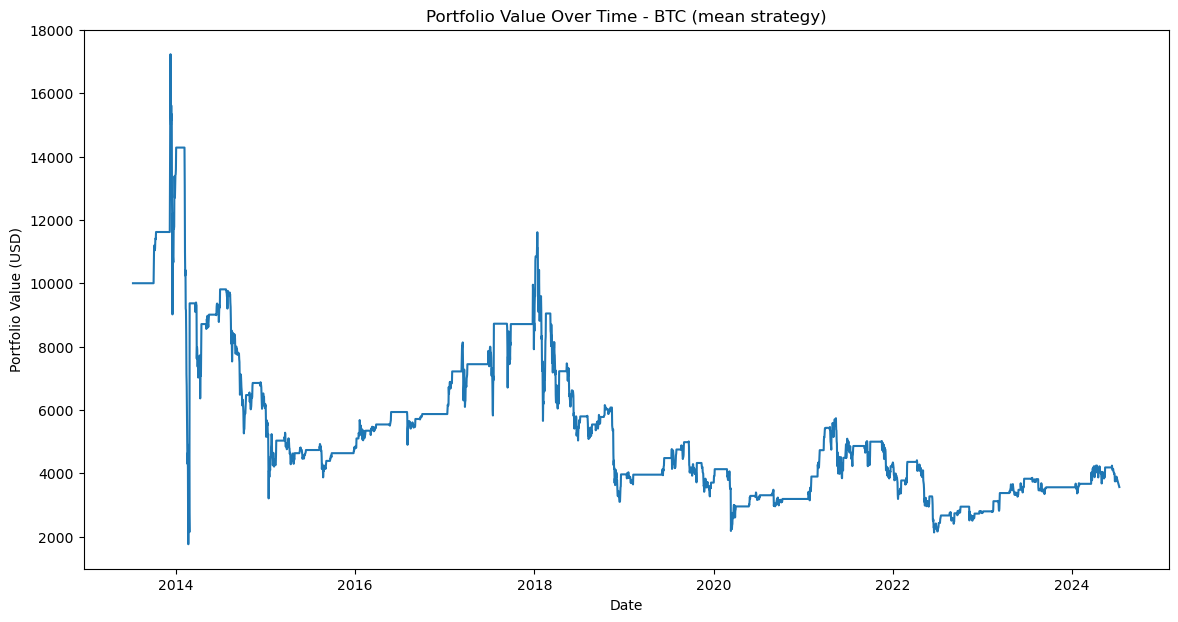


Backtest results for ETH using mean strategy:
        Date     Cash  Position  Portfolio Value
0 2013-07-10  10000.0       0.0          10000.0
1 2015-08-07  10000.0       0.0          10000.0
2 2015-08-08  10000.0       0.0          10000.0
3 2015-08-09  10000.0       0.0          10000.0
4 2015-08-10  10000.0       0.0          10000.0


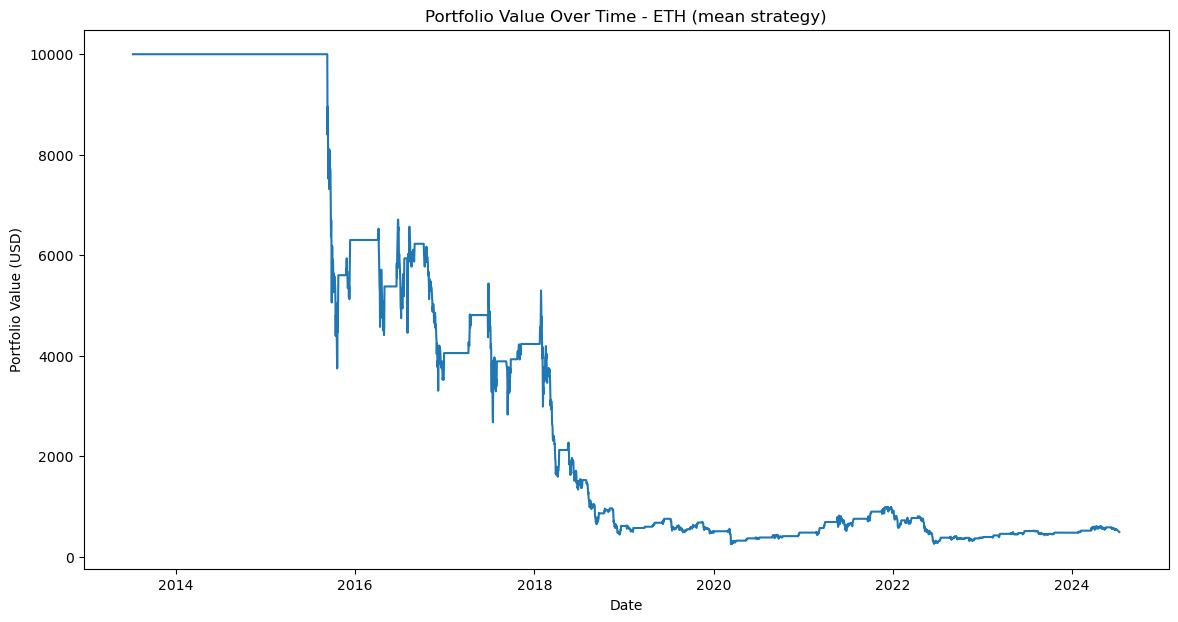


Backtest results for SOL using mean strategy:
        Date     Cash  Position  Portfolio Value
0 2013-07-10  10000.0       0.0          10000.0
1 2020-04-10  10000.0       0.0          10000.0
2 2020-04-11  10000.0       0.0          10000.0
3 2020-04-12  10000.0       0.0          10000.0
4 2020-04-13  10000.0       0.0          10000.0


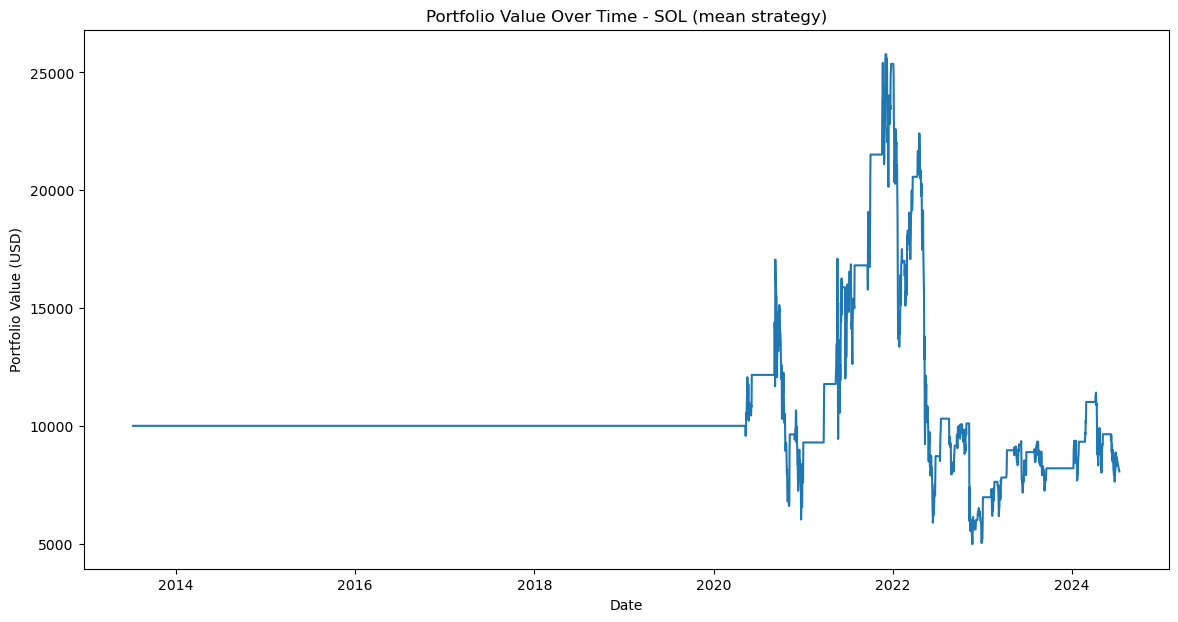

In [5]:
# Cell 5: Display and Plot Backtest Results
for key, results in backtest_results.items():
    crypto, strategy = key.split('_')[0], key.split('_')[1]
    print(f"\nBacktest results for {crypto} using {strategy} strategy:")
    print(results.head())
    
    plt.figure(figsize=(14, 7))
    plt.plot(results['Date'], results['Portfolio Value'])
    plt.title(f'Portfolio Value Over Time - {crypto} ({strategy} strategy)')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (USD)')
    plt.show()
